In [319]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.metrics import accuracy_score
from scipy import misc      # for 
from sklearn import preprocessing
np.random.seed(1)
path = './randomfaces4ar/randomfaces4ar.mat' # path to the database 

from scipy import io
train_ids = np.concatenate((np.arange(0, 25),np.arange(50,75)))
test_ids = np.concatenate((np.arange(25, 50),np.arange(75,100)))
view_ids = np.hstack((np.arange(0, 7), np.arange(13, 20)))

# Đọc tệp tin MAT
mat_data = io.loadmat(path)
# Truy cập vào các biến trong tệp tin
featureMat = mat_data['featureMat']
filenameMat = mat_data['filenameMat']
labelMat = mat_data['labelMat']
print('Kích thước featureMat:', featureMat.shape)
print('Kích thước filenameMat:', filenameMat.shape)
print('Kích thước labelMat:', labelMat.shape)
print(train_ids.shape)
print(test_ids)
print(view_ids.shape)
print(labelMat)


Kích thước featureMat: (540, 2600)
Kích thước filenameMat: (1, 100)
Kích thước labelMat: (100, 2600)
(50,)
[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
(14,)
[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]]


In [168]:
file_feature = np.array(featureMat)
print(file_feature[:,0].shape)

(540,)


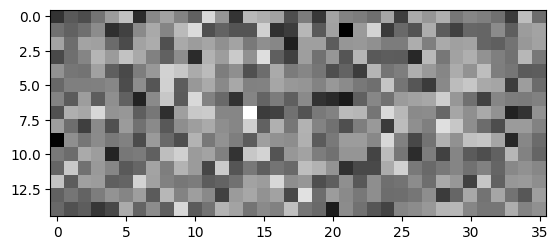

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# Lấy vector đặc trưng từ featureMat
vector_feature = featureMat[:, 0]  # Lấy vector đặc trưng đầu tiên

# Chuyển vector đặc trưng thành ma trận ảnh
image = vector_feature.reshape(15, 36)  

# Hiển thị ảnh
plt.imshow(image, cmap='gray')
plt.show()


In [161]:
# Chuyển đổi filenameMat thành danh sách tên tệp
file_names = filenameMat.tolist()[0]

print(len(file_names))
t = file_names[49][0]
# print(t[13:20])
# In từng tên tệp ra
# for file_name in t[1]:
#     print(file_name)
for i in test_ids:
    print(file_names[i])


100
[[array(['M-026-01.bmp'], dtype='<U12')
  array(['M-026-02.bmp'], dtype='<U12')
  array(['M-026-03.bmp'], dtype='<U12')
  array(['M-026-04.bmp'], dtype='<U12')
  array(['M-026-05.bmp'], dtype='<U12')
  array(['M-026-06.bmp'], dtype='<U12')
  array(['M-026-07.bmp'], dtype='<U12')
  array(['M-026-08.bmp'], dtype='<U12')
  array(['M-026-09.bmp'], dtype='<U12')
  array(['M-026-10.bmp'], dtype='<U12')
  array(['M-026-11.bmp'], dtype='<U12')
  array(['M-026-12.bmp'], dtype='<U12')
  array(['M-026-13.bmp'], dtype='<U12')
  array(['M-026-14.bmp'], dtype='<U12')
  array(['M-026-15.bmp'], dtype='<U12')
  array(['M-026-16.bmp'], dtype='<U12')
  array(['M-026-17.bmp'], dtype='<U12')
  array(['M-026-18.bmp'], dtype='<U12')
  array(['M-026-19.bmp'], dtype='<U12')
  array(['M-026-20.bmp'], dtype='<U12')
  array(['M-026-21.bmp'], dtype='<U12')
  array(['M-026-22.bmp'], dtype='<U12')
  array(['M-026-23.bmp'], dtype='<U12')
  array(['M-026-24.bmp'], dtype='<U12')
  array(['M-026-25.bmp'], dtype='<U1

In [243]:
def build_list_fn(indices, img_ids, view_ids ):
    list_fn = []
    list_check = [ indices[i] for i in img_ids ]
    # print(list_check)
    for list in list_check:
        list_1 = [ list[i] for i in view_ids ]
        list_fn.extend(list_1)
    # print(list_fn)    
    return list_fn


In [239]:
def build_data(indices,img_ids, view_ids):
    total_imgs = img_ids.shape[0]*view_ids.shape[0]
    y = np.hstack((np.zeros((int(total_imgs/2), )), np.ones((int(total_imgs/2), ))))
    list_index = build_list_fn(indices,img_ids,view_ids)
    X = [ featureMat[:,i] for i in list_index]
    return X,y


In [306]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))


def logistic_regression(X,y,weights,learning_rate,iteral,tol = 1e-4):
    w = [weights]
    N = X.shape[1]
    d = X.shape[0]
    count = 0 
    check = 20
    while count < iteral:
        mix_id = np.random.permutation(N) # tạo hoán vị các đặc trưng
        for i in mix_id:
            xi = X[:,i].reshape(d,1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T,xi))
            w_new = w[-1] + learning_rate*(yi-zi)*xi
            count+=1
            # điều kiện dừng
            if count % check == 0:
                if np.linalg.norm(w_new - w[-check])<tol:
                    return w
            w.append(w_new)
    return w

def accuracy_score(predict,labels):
    count = 0
    for i in range(len(predict)):
        predict[i] = 1 if predict[i] >= 0.5 else 0
        if predict[i] == labels[i]:
            count+=1
    accuracy = count/len(predict)
    return accuracy





In [322]:

def find_index(labelMat):
    labels = np.array(labelMat)
    indices = []
    for row in labels:
        ones_indices = np.where(row == 1)[0]
        indices.append(ones_indices)
    # print(indices)    
    return indices 
       
   
X_train, y_train = build_data(find_index(labelMat),train_ids,view_ids)
X_train = np.array(X_train)
print(X_train.T.shape)
X_train1 = X_train.T
X = np.concatenate((np.ones((1,X_train1.shape[1])),X_train1),axis = 0)
print(X.shape)
print(y_train.shape)
learning_rate = .05
iteral = 1000
d = X.shape[0]
weights = np.random.randn(d, 1)
# print(weights)

w = logistic_regression(X,y_train,weights,learning_rate,iteral)
# print(w[-1])
# print(sigmoid(np.dot(w[-1].T,X)))
X_test, y_test = build_data(find_index(labelMat),test_ids,view_ids)
X_test = np.array(X_test)
X_test1 = X_test.T
X_1 = np.concatenate((np.ones((1,X_test1.shape[1])),X_test1),axis = 0)
sig = sigmoid(np.dot(w[-1].T,X_1))
print(sig.shape)
sig = sig.reshape(y_test.shape)  # Reshape sig to match the shape of y_test



# y_pred = logreg.predict(X_test)
print ("Accuracy: %.2f %%" %(100*accuracy_score(sig, y_test)))
# t = accuracy_score(sig,y_test)


(540, 700)
(541, 700)
(700,)
(1, 700)
Accuracy: 88.86 %


/var/folders/n7/mnjg2yd92qb330kbr2fnlv6r0000gn/T/ipykernel_17972/1234842754.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-z))


In [317]:

print(X_train.shape)
logreg = linear_model.LogisticRegression(C=1e5) # just a big number 
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print ("Accuracy: %.2f %%" %(100*accuracy_score(y_pred, y_test)))

test1 = featureMat[:,644]
test2 = featureMat[:,1944]
test3 = featureMat[:,645]
test4 = featureMat[:,1945]

p1 = np.round(logreg.predict_proba(test1.reshape(1,-1)),2)
print(p1)

p2 = np.round(logreg.predict_proba(test2.reshape(1,-1)),2)
print(p2)

p3 = np.round(logreg.predict_proba(test3.reshape(1,-1)),2)
print(p3)

p4 = np.round(logreg.predict_proba(test4.reshape(1,-1)),2)
print(p4)

(700, 540)
Accuracy: 92.00 %
[[1. 0.]]
[[0. 1.]]
[[0.96 0.04]]
[[0. 1.]]
